In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump

In [ ]:
#Importing the dataset

student_data = pd.read_csv('StudentPerformanceFactors.csv')
print(student_data.columns)

In [ ]:
#Checking for null values in the dataset

student_data.isnull().sum()

In [ ]:
student_data.head()

In [ ]:
#Extracting the independent variable - Hours_Studied

X = student_data[['Hours_Studied']]
X.head()

In [ ]:
#Extracting the dependent variable - Exam_Score

y = student_data['Exam_Score']
y.head()

0    67
1    61
2    74
3    71
4    70
Name: Exam_Score, dtype: int64

In [ ]:
#Splitting the dataset into training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Predicting the test results

y_pred = lr.predict(X_test)
y_pred

array([67.23038633, 66.36336943, 69.5424314 , ..., 64.05132435,
       64.91834125, 65.49635252])

In [ ]:
#Evaluation of the model perfromance

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE: 2.5493510135537822
MSE: 11.685667899590845
RMSE: 3.418430619391133


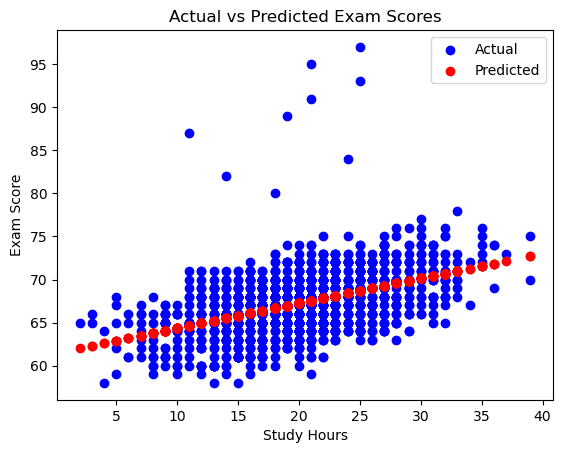

In [ ]:
#Visualization of the predictions

import matplotlib.pyplot as plt

#Original Data
plt.scatter(X_test, y_test, color="blue", label="Actual")

#Predicted Data
plt.scatter(X_test, y_pred, color="red", label="Predicted")

plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.legend()
plt.show()


Text(0, 0.5, 'Exam Score')

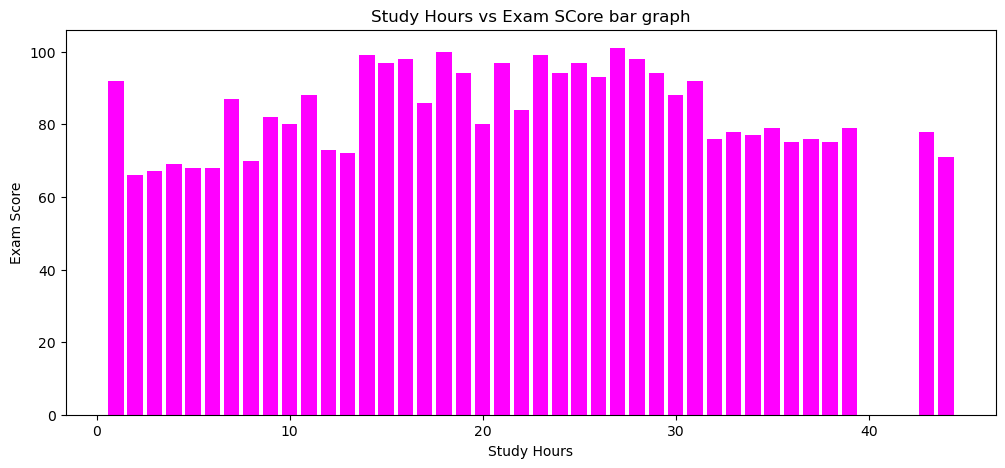

In [40]:
#Bar Plot

fig = plt.figure(figsize=(12,5))

plt.bar(student_data['Hours_Studied'],student_data['Exam_Score'],color='magenta')
plt.title('Study Hours vs Exam SCore bar graph')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')

In [41]:
file = 'student_score_prediction_model'
dump(lr,file)

['student_score_prediction_model']

In [3]:
from tkinter import *
from tkinter import ttk
import joblib


app = Tk()
app.title("Student Score Prediction")
app.geometry("600x500")
app.config(bg="#2c003e")


title = Label(app, text="📘 Student Score Prediction 📘", 
              bg="#2c003e", fg="white",
              font=('Helvetica', 22, "bold"))
title.pack(pady=20)


input_frame = Frame(app, bg="#512b58", bd=5, relief=RIDGE)
input_frame.pack(pady=20, padx=20, fill="x")

Label(input_frame, text="Hours Studied:", font=('Helvetica', 16), 
      bg="#512b58", fg="white").grid(row=0, column=0, padx=20, pady=20)

hours = Entry(input_frame, font=('Helvetica', 16), width=15)
hours.grid(row=0, column=1, padx=20, pady=20)


result_frame = Frame(app, bg="#2c003e")
result_frame.pack(pady=20)

lresult = Label(result_frame, text="Predicted Score will appear here",
                font=('Helvetica', 14), bg="#2c003e", fg="white")
lresult.pack(pady=10)


progress = ttk.Progressbar(result_frame, orient=HORIZONTAL, length=400, mode='determinate')
progress.pack(pady=15)



def predict():
    try:
        model = joblib.load("student_score_prediction_model")
        hoursInput = float(hours.get())

        pred = model.predict([[hoursInput]])
        score = pred[0]

        lresult.config(text=f"🎯 Predicted Score: {score:.2f}%", fg="#00ff99")

        # Update progress bar
        progress['value'] = min(max(score, 0), 100)

    except ValueError:
        lresult.config(text="⚠ Please enter a valid number!", fg="red")
        progress['value'] = 0
    except Exception as e:
        lresult.config(text=f"Error: {str(e)}", fg="red")
        progress['value'] = 0


def clear_fields():
    hours.delete(0, END)
    lresult.config(text="Predicted Score will appear here", fg="white")
    progress['value'] = 0



btn_frame = Frame(app, bg="#2c003e")
btn_frame.pack(pady=10)

btn_predict = Button(btn_frame, text="🔮 PREDICT", width=12,
                     font=('Helvetica', 14, "bold"), bd=5, bg="#1a75ff", fg="white",
                     command=predict)
btn_predict.grid(row=0, column=0, padx=20)

btn_clear = Button(btn_frame, text="🧹 CLEAR", width=12,
                   font=('Helvetica', 14, "bold"), bd=5, bg="#ff3333", fg="white",
                   command=clear_fields)
btn_clear.grid(row=0, column=1, padx=20)


app.mainloop()


In [ ]:
#Experimented with different feature combiations
#Used Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Physical_Activity as my features

In [17]:
student_data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [19]:
X = student_data[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity']]
X.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
0,23,84,7,73,0,3
1,19,64,8,59,2,4
2,24,98,7,91,2,4
3,29,89,8,98,1,4
4,19,92,6,65,3,4


In [20]:
y = student_data['Exam_Score']
y.head()

0    67
1    61
2    74
3    71
4    70
Name: Exam_Score, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_test)
y_pred

array([69.96204705, 65.24217783, 67.57153533, ..., 66.26454559,
       66.47325126, 63.97360908])

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1.2931219020050915
MSE: 5.816445918932157
RMSE: 2.4117308968730646


In [27]:
file = 'student_score_prediction_model2'
dump(lr,file)

['student_score_prediction_model2']